# Assignment

In [32]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15, train a model with regularization. Try different regularization options. Make conclusions.

In [33]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [34]:
# Create test points for smooth curve plotting
X_test = np.linspace(0, 1, 100)
y_true = true_fun(X_test)

In [35]:
# Reshape for sklearn
X_train = X.reshape(-1, 1)
X_test_plot = X_test.reshape(-1, 1)

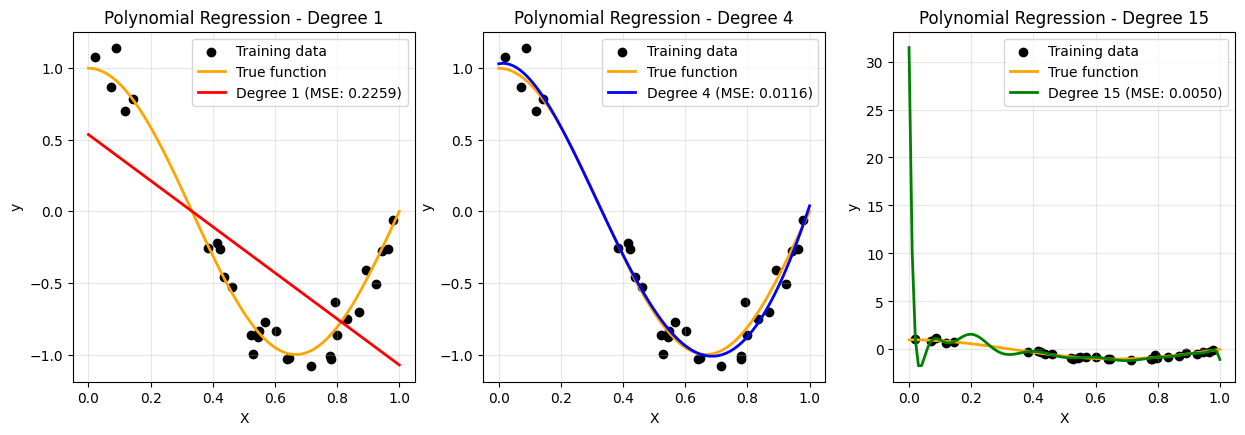

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.figure(figsize=(15, 10))

degrees = [1, 4, 15]
colors = ['red', 'blue', 'green']

for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test_plot)

    # Fit linear regression
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Calculate training MSE
    train_pred = model.predict(X_poly)
    train_mse = mean_squared_error(y, train_pred)

    # Plot results
    plt.scatter(X, y, color='black', alpha=1, label='Training data')
    plt.plot(X_test, y_true, color='orange', linewidth=2, label='True function')
    plt.plot(X_test, y_pred, color=colors[i], linewidth=2,
             label=f'Degree {degree} (MSE: {train_mse:.4f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression - Degree {degree}')
    plt.legend()
    plt.grid(True, alpha=0.3)

No Regularization: Training MSE = 0.0050
Ridge (α=0.1): Training MSE = 0.0243
Ridge (α=1.0): Training MSE = 0.1162


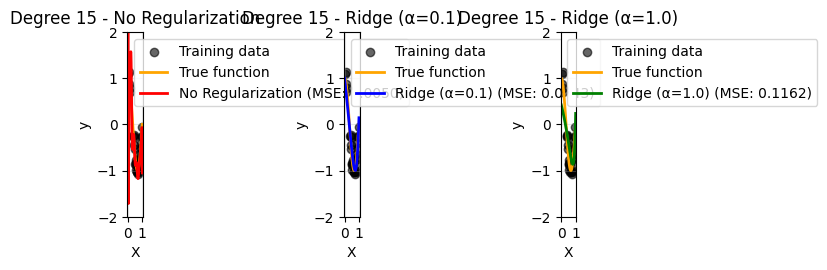

In [37]:
from sklearn.linear_model import Ridge, Lasso

regularization_methods = [
    ('No Regularization', LinearRegression()),
    ('Ridge (α=0.1)', Ridge(alpha=0.1)),
    ('Ridge (α=1.0)', Ridge(alpha=1.0)),
    ('Ridge (α=10.0)', Ridge(alpha=10.0)),
    ('Lasso (α=0.01)', Lasso(alpha=0.01, max_iter=2000)),
    ('Lasso (α=0.1)', Lasso(alpha=0.1, max_iter=2000))
]

# Prepare degree 15 polynomial features
poly_features_15 = PolynomialFeatures(degree=15)
X_poly_15 = poly_features_15.fit_transform(X_train)
X_test_poly_15 = poly_features_15.transform(X_test_plot)

reg_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

for i, (name, model) in enumerate(regularization_methods[:3]):
    plt.subplot(2, 3, i + 4)

    # Fit model
    model.fit(X_poly_15, y)

    # Make predictions
    y_pred = model.predict(X_test_poly_15)

    # Calculate training MSE
    train_pred = model.predict(X_poly_15)
    train_mse = mean_squared_error(y, train_pred)

    print(f"{name}: Training MSE = {train_mse:.4f}")

    # Plot results
    plt.scatter(X, y, color='black', alpha=0.6, label='Training data')
    plt.plot(X_test, y_true, color='orange', linewidth=2, label='True function')
    plt.plot(X_test, y_pred, color=reg_colors[i], linewidth=2,
             label=f'{name} (MSE: {train_mse:.4f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Degree 15 - {name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-2, 2)  # Limit y-axis to see the patterns better

plt.tight_layout()
plt.show()



In [38]:
for name, model in regularization_methods:
    model.fit(X_poly_15, y)
    train_pred = model.predict(X_poly_15)
    train_mse = mean_squared_error(y, train_pred)

    # Count non-zero coefficients (for sparsity analysis)
    if hasattr(model, 'coef_'):
        non_zero_coefs = np.sum(np.abs(model.coef_) > 1e-6)
        print(f"{name:20}: MSE = {train_mse:.6f}, Non-zero coefficients = {non_zero_coefs}")
    else:
        print(f"{name:20}: MSE = {train_mse:.6f}")


No Regularization   : MSE = 0.004986, Non-zero coefficients = 15
Ridge (α=0.1)       : MSE = 0.024254, Non-zero coefficients = 15
Ridge (α=1.0)       : MSE = 0.116239, Non-zero coefficients = 15
Ridge (α=10.0)      : MSE = 0.320576, Non-zero coefficients = 15
Lasso (α=0.01)      : MSE = 0.033041, Non-zero coefficients = 2
Lasso (α=0.1)       : MSE = 0.353285, Non-zero coefficients = 1


Problem 2. For this one, you shall be builduing a small full-cycle ML development pipeline.
You are provided with Boston Housing data, but you may find a dataset of your liking to use in place of the suggested one.

1. Load the Boston Housing dataset using sklearn.datasets.load_boston()
- Explore the dataset: check its shape, features, and basic statistics


2. Split the data into features (X) and target variable (y)
- Perform any necessary scaling or normalization of the features
- Split the data into training and testing sets

3. Choose at least two different regression models from scikit-learn (e.g., LinearRegression, RandomForestRegressor, Ridge, Lasso)
- Train each model on the training data

4. Make predictions on the test set using each model
- Calculate and compare the following metrics for each model:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

5. Visualize the predicted vs. actual values for each model

In [39]:
sklearn.datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
